In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
img=cv2.imread('C:\\Users\\sayak\\anaconda3\\lena_gray_512.tif',0)
img_arr=np.asarray(img)
height,width=np.shape(img)

In [6]:
# Creating a frame of pixels with value zero around the image
img_frame=np.zeros((height+2,width+2),dtype='uint8')
for i in range (height):
    for j in range(width):
        img_frame[i+1][j+1]=img_arr[i][j]

In [7]:
def get_surrounding_pixel_value(img,mid_pixel,x,y):
    if(img[x][y]>=mid_pixel):
        return 1
    else:
        return 0

In [8]:
def LBP_pixel_value(img,x,y):
    mid_pixel=img[x][y]

    # TL -> T -> TR -> R -> BR -> B -> BL -> L

    new_mid_pixel_val=(
        get_surrounding_pixel_value(img,mid_pixel,x-1,y-1)*128+
        get_surrounding_pixel_value(img,mid_pixel,x-1,y)*64+
        get_surrounding_pixel_value(img,mid_pixel,x-1,y+1)*32+
        get_surrounding_pixel_value(img,mid_pixel,x,y+1)*16+
        get_surrounding_pixel_value(img,mid_pixel,x+1,y+1)*8+
        get_surrounding_pixel_value(img,mid_pixel,x+1,y)*4+
        get_surrounding_pixel_value(img,mid_pixel,x+1,y-1)*2+
        get_surrounding_pixel_value(img,mid_pixel,x,y-1)*1)

    return new_mid_pixel_val

In [9]:
lbp_arr=np.zeros((height,width),dtype='uint8')

for i in range (1,height):
    for j in range(1,width):
        lbp_arr[i][j]=LBP_pixel_value(img_frame,i,j)

Text(0.5, 1.0, 'LBP')

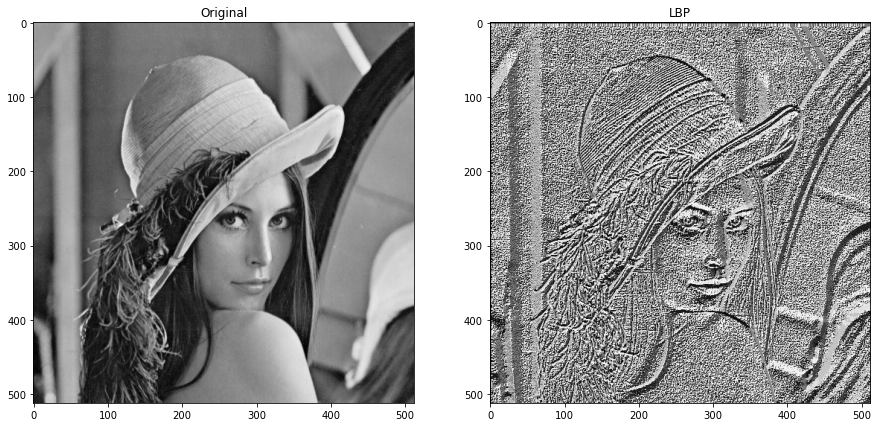

In [10]:
#print(lbp_arr)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(lbp_arr, 'gray')
plt.title('LBP')